In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [24]:
data = pd.read_csv('big_df.csv')

In [26]:
# grab measurements from morrison cove only
morrison_coords = [
    (-106.84571, 40.27901),
    (-106.84161, 40.27271),
    (-106.83723, 40.27443),
    (-106.84196, 40.28115)
]

morrison_cove = Polygon(morrison_coords)

data['in_poly'] = data.apply(lambda row: morrison_cove.contains(Point(row['Longitude'], row['Latitude'])), axis=1)
morrison_data = data[data['in_poly']].drop(columns='in_poly')

In [28]:
morrison_data_files = {
    file_name: group for file_name, group in morrison_data.groupby('File Name')
}


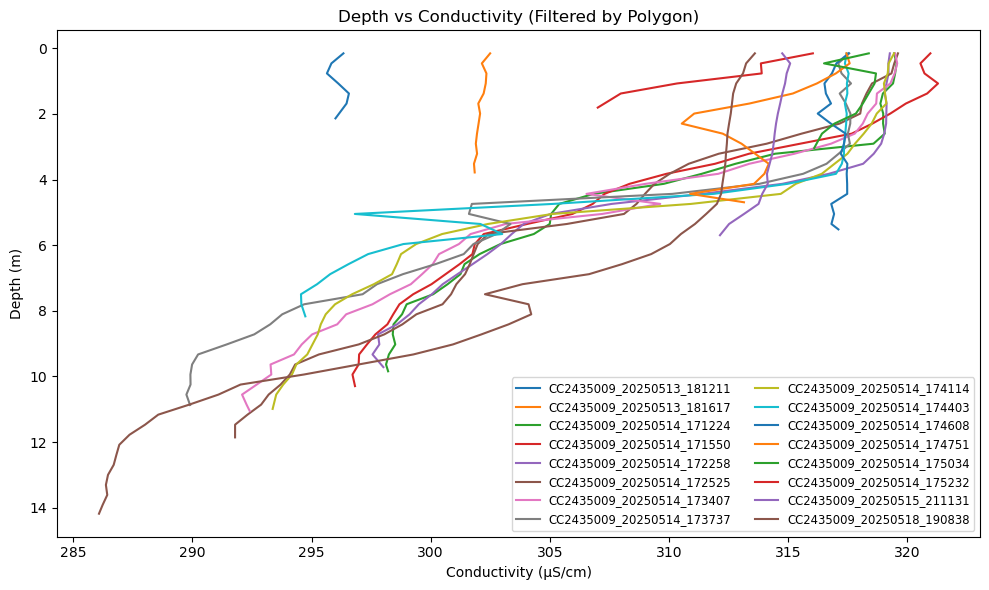

In [29]:
plt.figure(figsize=(10, 6))

for file_name, data in morrison_data_files.items():
    plt.plot(data['Conductivity (µS/cm)'], data['Depth (m)'], label=file_name)

plt.gca().invert_yaxis()
plt.xlabel('Conductivity (µS/cm)')
plt.ylabel('Depth (m)')
plt.title('Depth vs Conductivity (Filtered by Polygon)')
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()